# Titanic - Machine Learning from Disaster
I have to finish this task by analyzing the kind of persons who were most likely to survive. I need to use machine learning methods in particular to foretell which passengers will survive the disaster.

The information is divided into two categories:

    1. Training set (train.csv)
    2. Test set(test.csv)

The training set includes information about passenger survival rates (often referred to as the Titanic tragedy's "ground reality"), which is combined with additional variables including gender, class, fare, and pclass to develop a machine learning model.

To evaluate how well my model works on unobserved data, utilize the test set. Passengers' chances of survival are not disclosed in the test set. To forecast the likelihood of passenger survival, we will apply our model.

Let's discuss the significance of the characteristics provided in the train and test datasets.


**Data Dictionary**

| **Attribute** | **Data Type** | **Definition** | **Key** |
| --- | --- | --- | --- |
| PassengerId | int64 | Serial number of passenger |  | 
| Survival | int64 | Survival  | 0 = No, 1 = Yes |
| pclass | int64 | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Name | object | Name of Passenger|  |
| sex | object | Sex |
| Age | float64 | Age in years |  |
| sibsp |int64 | # of siblings / spouses aboard the Titanic |  |
| parch | int64 | # of parents / children aboard the Titanic |
| Tickets | object | Ticket number |  |
| fare | float64 | Passenger fare |  |
| cabin | object | Cabin number |  |
| Embarked | object | Port of Embarkation |C = Cherbourg, Q = Queenstown, S = Southampton |


# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# remove warning
import warnings
warnings.filterwarnings(action='ignore')
print('Libraries have been imported')

Libraries have been imported


# Step-1: Gathering Data

<font color ='red'> Titanic train dataset  </font>

In [7]:
Train_data=pd.read_csv('Data/train.csv', index_col='PassengerId')
# Dataset is copied from one variable to another.
Train_df = Train_data.copy()
Train_df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Here, the entire Dataset has been aggregated and the PassengerId column is used as the index column.

In [3]:
# Checking the number of  rows and columns
print('Shape of data: {}'.format(Train_df.shape))
print('Number of rows: {}'.format(Train_df.shape[0]))
print('Number of columns: {}'.format(Train_df.shape[1]))

Shape of data: (891, 11)
Number of rows: 891
Number of columns: 11


<font color ='red'> Titanic test dataset  </font>

In [4]:
Test_data=pd.read_csv('Data/test.csv')
# Dataset is copied from one variable to another.
Test_df = Test_data.copy()
Test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Checking the number of  rows and columns
print('Shape of data: {}'.format(Test_df.shape))
print('Number of rows: {}'.format(Test_df.shape[0]))
print('Number of columns: {}'.format(Test_df.shape[1]))

Shape of data: (418, 11)
Number of rows: 418
Number of columns: 11


# Step-2: Data preprocessing

<font color ='red'> Titanic train dataset  </font>

In [6]:
# Checking the number of  null values
Train_df.isnull().sum().sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64

In [7]:
# Counting the number of distinct elements.
Train_df.nunique().sort_values(ascending=False)

Name        891
Ticket      681
Fare        248
Cabin       147
Age          88
SibSp         7
Parch         7
Pclass        3
Embarked      3
Survived      2
Sex           2
dtype: int64

In [8]:
# printing information about the DataFrame.
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
# Removing duplicate rows return the DataFrame.
Train_df.drop_duplicates(inplace=True)

    |  Droped unnecessary columns

In [10]:
# Unnecessary columns are omitted.
Train_df.drop(columns=['Name', 'Cabin'], inplace=True)

<font color ='red'>Note: </font> The Name and Cabin columns have neen omitted because these are not importent for estimating which people survived.

    | Changing Data type

In [11]:
# Selected only those columns which data type is object
Train_df.select_dtypes('object')

,Sex,Ticket,Embarked
PassengerId,,,
1,male,A/5 21171,S
2,female,PC 17599,C
3,female,STON/O2. 3101282,S
4,female,113803,S
5,male,373450,S
...,...,...,...
887,male,211536,S
888,female,112053,S
889,female,W./C. 6607,S


In [12]:
# The value_counts() method is used to count the number of males and females
Train_df.select_dtypes('object')[['Sex']].value_counts()

Sex   
male      577
female    314
dtype: int64

In [13]:
# The value_counts() method is used to check  the diversity of Tickets.
Train_df.select_dtypes('object')['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

 <font color ='red'>Note: </font> There are many varitions. so, it is also not importent for estimating which people survived.

In [14]:
# Dropped Tickets column.
Train_df.drop(columns=['Ticket'], inplace=True)

In [15]:
#  The value_counts() method is used to check  the diversity of Embarked column.
Train_df.select_dtypes('object')['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
# Checking unique values
Train_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
# Checking mode
Train_df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [18]:
# Null is replaced  by 'S'
Train_df.Embarked.replace(np.nan, 'S', inplace=True)

In [19]:
# Each value in the Sex and Embarked columns is Changed from a string to an integer.
for obj_col in Train_df.select_dtypes('object').columns:
    Train_df[obj_col] = Train_df[obj_col].astype('category').cat.codes

In [20]:
# Generated descriptive statistics.
Train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Sex,891.0,0.647587,0.477990,0.00,0.0000,1.0000,1.0,1.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Embarked,891.0,1.536476,0.791503,0.00,1.0000,2.0000,2.0,2.0000


    | Imputing missing values

In [21]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

In [22]:
# The KNNImputer class instance is fitted and all missing values are imputed.
Train_imputed_np = imputer.fit_transform(Train_df)

The training set's n neighbors nearest neighbors are used to compute the mean value for each sample's missing data. The qualities that neither sample lacks define two samples as being near.

In [23]:
# numpy.ndarray is moved back to dataFrame
Train_imputed_df = pd.DataFrame(Train_imputed_np, columns=Train_df.columns, dtype=np.float16)
Train_imputed_df.sample(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
541,0.0,3.0,0.0,9.00000,4.0,2.0,31.28125,2.0
527,0.0,1.0,1.0,28.40625,0.0,0.0,221.75000,2.0


In [24]:
# Checking the number of  null values
Train_imputed_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [25]:
# printing information about the DataFrame
Train_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float16
 1   Pclass    891 non-null    float16
 2   Sex       891 non-null    float16
 3   Age       891 non-null    float16
 4   SibSp     891 non-null    float16
 5   Parch     891 non-null    float16
 6   Fare      891 non-null    float16
 7   Embarked  891 non-null    float16
dtypes: float16(8)
memory usage: 14.0 KB


    | Handling imbalance dataset

In [26]:
# Counting the number of survived and not survived people.
Train_imputed_df.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

<font color ='red'>Note: </font> The dataset is somewhat imbalance

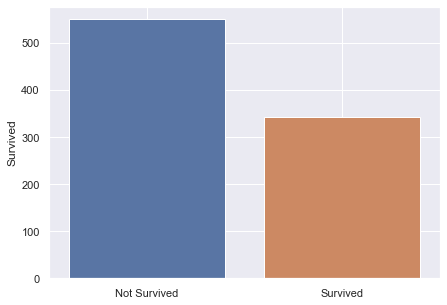

In [122]:
# plotting a barplot
plt.figure(figsize=(7, 5))
sns.set(style='dark')
sns.barplot(x=['Not Survived', 'Survived'],y=Train_imputed_df.Survived.value_counts())
plt.grid()
plt.show()

In [28]:
from imblearn.under_sampling import NearMiss  # under sampling module
from imblearn.over_sampling import RandomOverSampler  # over sampling module

imblearn is a library which deal with imbalanced dataset

    | Over_sampling

In [29]:
over_sampler = RandomOverSampler(random_state=42)

In [30]:
# Separating features columns
features = Train_imputed_df.drop(columns=['Survived'])
# Separating target columns
target = Train_imputed_df[['Survived']]

In [31]:
# Resampled the dataset.
Resampled_features, Resampled_target = over_sampler.fit_resample(features, target)

In [32]:
# concatenated Resampled_features and Resampled_target dataset
Resampled_df = pd.concat([Resampled_features, Resampled_target], axis=1, join='inner')
Resampled_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3.0,1.0,22.00000,1.0,0.0,7.250000,2.0,0.0
1,1.0,0.0,38.00000,1.0,0.0,71.312500,0.0,1.0
2,3.0,0.0,26.00000,0.0,0.0,7.925781,2.0,1.0
3,1.0,0.0,35.00000,1.0,0.0,53.093750,2.0,1.0
4,3.0,1.0,35.00000,0.0,0.0,8.046875,2.0,0.0
...,...,...,...,...,...,...,...,...
1093,3.0,1.0,29.00000,0.0,0.0,7.750000,1.0,1.0
1094,1.0,0.0,21.00000,0.0,0.0,77.937500,2.0,1.0
1095,1.0,1.0,42.40625,0.0,0.0,29.703125,0.0,1.0
1096,1.0,0.0,30.00000,0.0,0.0,93.500000,2.0,1.0


<font color ='red'> Titanic test dataset  </font>

In [33]:
# Checking the number of  null values
Test_df.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [34]:
# Counting the number of distinct elements.
Test_df.nunique().sort_values(ascending=False)

PassengerId    418
Name           418
Ticket         363
Fare           169
Age             79
Cabin           76
Parch            8
SibSp            7
Pclass           3
Embarked         3
Sex              2
dtype: int64

In [35]:
# printing information about the DataFrame.
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [36]:
# Removing duplicate rows return the DataFrame.
Test_df.drop_duplicates(inplace=True)

    | Droped unnecessary columns

In [37]:
# Unnecessary columns are omitted.
Test_df.drop(columns=['PassengerId','Name', 'Cabin'], inplace=True)

<font color ='red'>Note: </font> The PassengerId, Name and Cabin columns have neen omitted because these are not importent for estimating which people survived.

    | Changing Data type

In [38]:
# Selected only those columns which data type is object
Test_df.select_dtypes('object')

,Sex,Ticket,Embarked
0,male,330911,Q
1,female,363272,S
2,male,240276,Q
3,male,315154,S
4,female,3101298,S
...,...,...,...
413,male,A.5. 3236,S
414,female,PC 17758,C
415,male,SOTON/O.Q. 3101262,S
416,male,359309,S


In [39]:
# The value_counts() method is used to count the number of males and females
Test_df.select_dtypes('object')[['Sex']].value_counts()

Sex   
male      266
female    152
dtype: int64

In [40]:
# The value_counts() method is used to check  the diversity of Tickets.
Test_df.select_dtypes('object')['Ticket'].value_counts()

PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64

 <font color ='red'>Note: </font> There are many varitions. so, it is also not importent for estimating which people survived.

In [41]:
# Dropped Tickets column.
Test_df.drop(columns=['Ticket'], inplace=True)

In [42]:
# The value_counts() method is used to check  the diversity of Embarked column.
Test_df.select_dtypes('object')['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [43]:
# Each value in the Sex and Embarked columns is Changed from a string to an integer.
for obj_col in Test_df.select_dtypes('object').columns:
    Test_df[obj_col] = Test_df[obj_col].astype('category').cat.codes

In [44]:
# Generated descriptive statistics.
Test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.0,3.0000
Sex,418.0,0.636364,0.481622,0.00,0.0000,1.0000,1.0,1.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.0,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.0,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.0,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.5,512.3292
Embarked,418.0,1.401914,0.854496,0.00,1.0000,2.0000,2.0,2.0000


    | Imputing missing values

In [45]:
# The KNNImputer class instance is fitted and all missing values are imputed.
Test_imputed_np = imputer.fit_transform(Test_df)

The training set's n neighbors nearest neighbors are used to compute the mean value for each sample's missing data. The qualities that neither sample lacks define two samples as being near.

In [46]:
# numpy.ndarray is moved back to dataFrame
Test_imputed_df = pd.DataFrame(Test_imputed_np, columns=Test_df.columns, dtype=np.float16)
Final_Test_df=Test_imputed_df.copy()
Final_Test_df.sample(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
204,2.0,1.0,25.0000,0.0,0.0,10.500000,2.0
10,3.0,1.0,34.3125,0.0,0.0,7.894531,2.0


In [47]:
# printing information about the DataFrame
Final_Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    float16
 1   Sex       418 non-null    float16
 2   Age       418 non-null    float16
 3   SibSp     418 non-null    float16
 4   Parch     418 non-null    float16
 5   Fare      418 non-null    float16
 6   Embarked  418 non-null    float16
dtypes: float16(7)
memory usage: 5.8 KB


In [48]:
# Checking the number of  null values
Final_Test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Step-3: Exploratory Data Analysis (EDA)

In [49]:
# Generated descriptive statistics.
Resampled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,1098.0,2.250000,0.852539,1.000000,1.000000,3.0,3.000000,3.0
Sex,1098.0,0.587402,0.492432,0.000000,0.000000,1.0,1.000000,1.0
Age,1098.0,29.734375,13.554688,0.419922,21.000000,29.0,37.750000,80.0
SibSp,1098.0,0.518066,1.035156,0.000000,0.000000,0.0,1.000000,8.0
Parch,1098.0,0.390625,0.795898,0.000000,0.000000,0.0,1.000000,6.0
Fare,1098.0,34.750000,inf,0.000000,7.925781,15.5,34.585938,512.5
Embarked,1098.0,1.516602,0.798828,0.000000,1.000000,2.0,2.000000,2.0
Survived,1098.0,0.500000,0.500000,0.000000,0.000000,0.5,1.000000,1.0


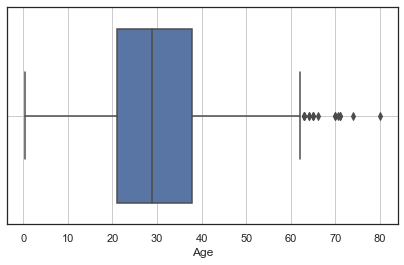

In [50]:
# Plotting a boxplot using the Age column
plt.figure(figsize=(7, 4))
sns.set(style='white')
sns.boxplot(Resampled_df.Age)
plt.grid()
plt.show()

In [51]:
# returned mean values of others columns acording to Survived column
Resampled_df.groupby(by='Survived').mean()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0.0,2.531250,0.852539,31.25000,0.553711,0.32959,22.12500,1.641602
1.0,1.966797,0.322510,28.21875,0.482666,0.45166,47.34375,1.391602


<Figure size 720x720 with 0 Axes>

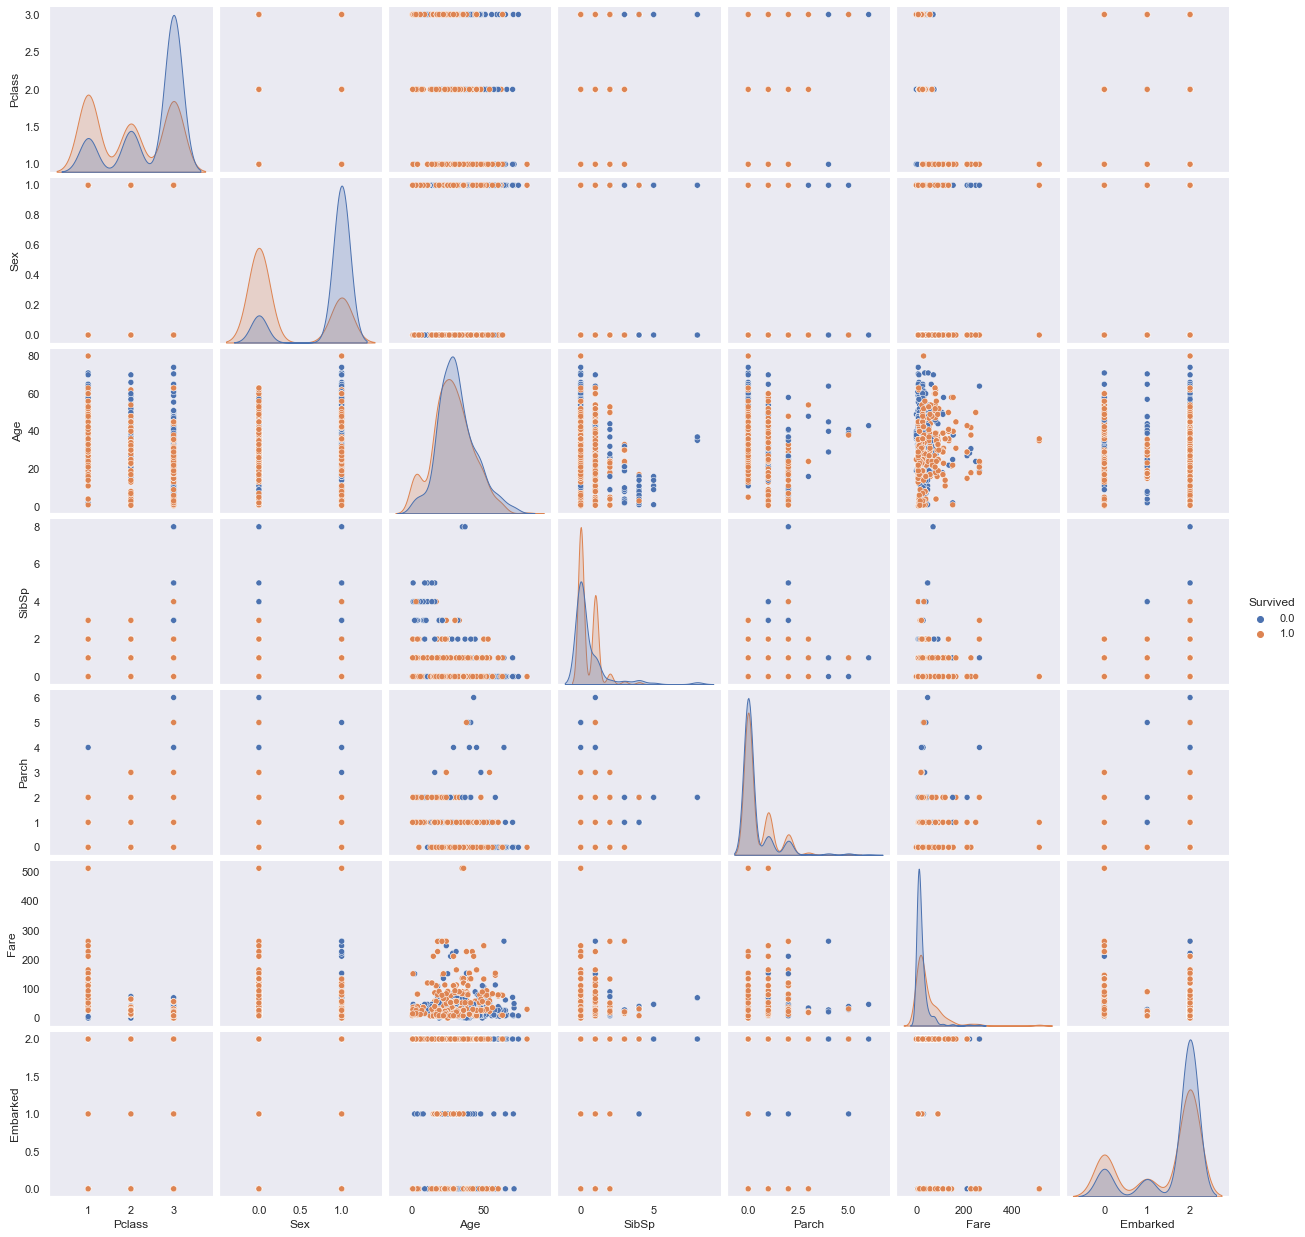

In [52]:
# Plotting pairwise relationships in dataset
plt.figure(figsize=(10, 10))
sns.set(style='dark')
sns.pairplot(Resampled_df, hue='Survived')
plt.grid()
plt.show()

Here, all datas is in categorical format. Hence, Relationships are very difficult to pinpoint

<AxesSubplot:>

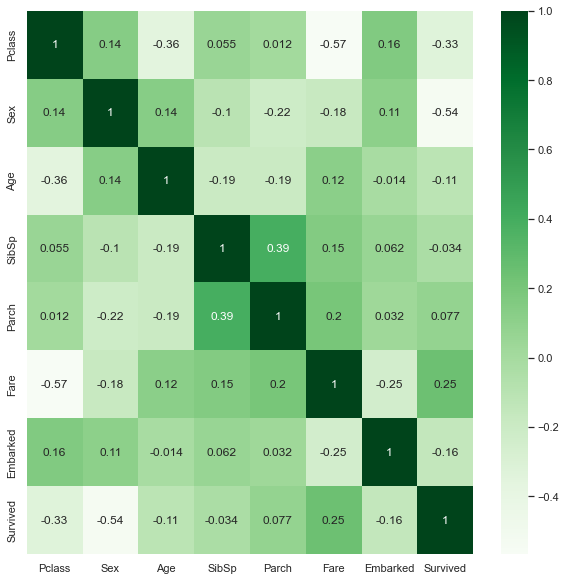

In [53]:
# Checking the correlation
correlation=Resampled_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='Greens')

# Step-4: Feature engineering/selection

    | train & test split

In [54]:
from sklearn.model_selection import train_test_split
# Splitting train and test data
xtrain, xtest, ytrain, ytest = train_test_split(Resampled_features, Resampled_target, random_state=42, test_size=0.25)
# Checking the number of  rows and columns
xtrain.shape, xtest.shape

((823, 7), (275, 7))

    | Feature selection

In [55]:
from sklearn.feature_selection import mutual_info_classif
# Estimated mutual information for a discrete target variable.
scores = mutual_info_classif(xtrain, ytrain, n_neighbors=5, random_state=42)
scores

array([0.04790246, 0.1256385 , 0.09300158, 0.03673609, 0.00616433,
       0.17125245, 0.00150693])

<font color ='red'>Note: </font>
The measurement of the dependence between two random variables is the mutual information, which has a non-negative value. If and only if two random variables are independent, then it equals zero, and larger values indicate greater dependence.

In [56]:
# numpy.ndarray is moved to the dataFrame.
scores = pd.DataFrame(scores, index=Resampled_features.columns, columns=['Scores', ])
# The score values are sorted
scores = scores.sort_values(by='Scores', ascending=False)
scores

,Scores
Fare,0.171252
Sex,0.125639
Age,0.093002
Pclass,0.047902
SibSp,0.036736
Parch,0.006164
Embarked,0.001507


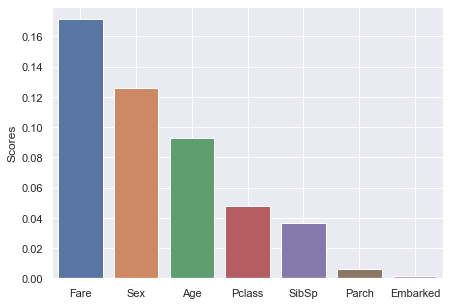

In [57]:
# Plotting a barplot
plt.figure(figsize=(7, 5))
sns.set(style='dark')
sns.barplot(data=scores, x=scores.index, y='Scores')
plt.grid()
plt.show()

In [58]:
from sklearn.feature_selection import SelectKBest
# best feature selection according to selector values
extractor = SelectKBest(mutual_info_classif, k=3)
extractor.fit(xtrain, ytrain)

# Features selected according to the k highest scores.
extractor = SelectKBest(mutual_info_classif, k=3)
extractor.fit(xtrain, ytrain)

# Mask feature names according to selected features.
best_features = extractor.get_feature_names_out()
best_features

array(['Sex', 'Age', 'Fare'], dtype=object)

# Step-5: Training model

# <font  color ='blue'> # Logistic Regression </font>    

In [59]:
from sklearn.linear_model import LogisticRegression

    | Hyper Parameter tuning

In [60]:
# Returned Parameter names mapped to their values.
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [61]:
LR_params = {

    'C': [2, 3, 4, 5, 6],
    'solver': ['newton-cg', 'liblinear', 'sag', 'saga', 'lbfgs']
}

In [62]:
from sklearn.model_selection import GridSearchCV
# Randomized search on hyper parameters.
LR_grid = GridSearchCV(

    LogisticRegression(),
    LR_params,
    cv=5,
    scoring='accuracy'
)  # we find out best model depending on the accuracy score

# Run fit with all sets of parameters
LR_grid.fit(features[best_features], target)  # fit the model to the grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [2, 3, 4, 5, 6],
                         'solver': ['newton-cg', 'liblinear', 'sag', 'saga',
                                    'lbfgs']},
             scoring='accuracy')

In [63]:
# getting  the best parametter for this data set
LR_grid.best_params_  

{'C': 2, 'solver': 'newton-cg'}

In [64]:
# Returned the list of most effective parametters
LR_grid.best_estimator_  

LogisticRegression(C=2, solver='newton-cg')

In [65]:
# returns accuracy score
LR_grid.best_score_

0.7822547234950725

In [66]:
# Train the model
LR_model = LogisticRegression(C=2, solver='newton-cg')
LR_model.fit(xtrain[best_features], ytrain)

LogisticRegression(C=2, solver='newton-cg')

In [67]:
# Predict the model
LR_ypred = LR_model.predict(xtest[best_features])
print(f"Predicted Values: \n\n{LR_ypred}")

Predicted Values: 

[1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]


     | Model evaluation

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

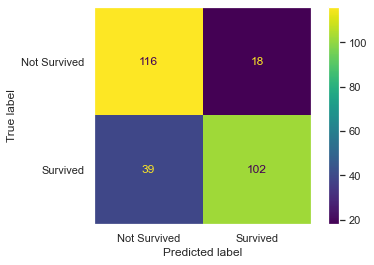

In [69]:
# confusion matrix
LR_cm = confusion_matrix(ytest, LR_ypred)
LR_cmd = ConfusionMatrixDisplay(LR_cm, display_labels=['Not Survived', 'Survived'])
LR_cmd.plot()

In [70]:
# Accuracy score
LR_acc_score = accuracy_score(ytest, LR_ypred).round(2)
print(f"Accuracy of Logistic Regression Model: {LR_acc_score*100} %")

Accuracy of Logistic Regression Model: 79.0 %


In [71]:
# classification report
LR_cla_report = classification_report(ytest, LR_ypred)
print(f"Classification Report: \n\n{LR_cla_report}")

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.75      0.87      0.80       134
         1.0       0.85      0.72      0.78       141

    accuracy                           0.79       275
   macro avg       0.80      0.79      0.79       275
weighted avg       0.80      0.79      0.79       275



    |Cross validation

In [72]:
from sklearn.model_selection import cross_val_score
# Evaluated a score by cross-validation.
LR_cvs = cross_val_score(LR_model, features[best_features], target, cv=5)

# mean value of cross_val_scores
cvs_mean = LR_cvs.mean().round(2)
print(f"Mean value of cross_val_score: {cvs_mean*100} %")

Mean value of cross_val_score: 78.0 %


    | ROC Curve

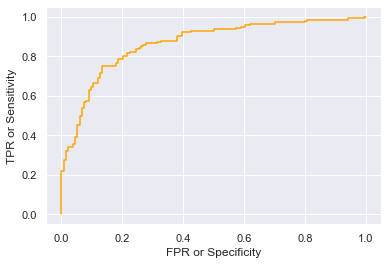

In [73]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# predicted all possible outcome
LR_ypred_prob = LR_model.predict_proba(xtest[best_features])
FPR, TPR, thresh = roc_curve(ytest, LR_ypred_prob[:,1])

# Ploting 
plt.plot(FPR, TPR, color='orange')
plt.ylabel("TPR or Sensitivity")
plt.xlabel("FPR or Specificity")
plt.grid()
plt.show()

# <font  color ='blue'> # Random Forest </font>    

In [74]:
from sklearn.ensemble import RandomForestClassifier

    | Hyper Parameter tuning

In [75]:
# Returned Parameter names mapped to their values.
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [76]:
RFC_params = {
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 9, 1),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': np.arange(25, 50, 5),
    'min_samples_split': np.arange(2, 20, 3),
    'n_estimators': [50, 100, 200],
    'warm_start': [False, True]
}

In [77]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Randomized search on hyper parameters.
RFC_grid = RandomizedSearchCV(

    RandomForestClassifier(),
    param_distributions=RFC_params,
    cv=5,
    scoring='accuracy'
)  # we find out best model depending on the accuracy score

# Run fit with all sets of parameters
RFC_grid.fit(features[best_features], target)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7, 8]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': array([25, 30, 35, 40, 45]),
                                        'min_samples_split': array([ 2,  5,  8, 11, 14, 17]),
                                        'n_estimators': [50, 100, 200],
                                        'warm_start': [False, True]},
                   scoring='accuracy')

In [78]:
# getting  the best parametter for this dataset
RFC_grid.best_params_

{'warm_start': False,
 'n_estimators': 200,
 'min_samples_split': 11,
 'max_leaf_nodes': 35,
 'max_features': 'log2',
 'max_depth': 5,
 'criterion': 'gini',
 'bootstrap': True}

In [79]:
# Returned the list of most effective parametters
RFC_grid.best_estimator_

RandomForestClassifier(max_depth=5, max_features='log2', max_leaf_nodes=35,
                       min_samples_split=11, n_estimators=200)

In [80]:
# returns accuracy score
RFC_grid.best_score_

0.811461929571276

In [81]:
# Train the model
RFC_model = RandomForestClassifier(max_depth=8, max_leaf_nodes=35, n_estimators=100)
RFC_model.fit(xtrain[best_features], ytrain)

RandomForestClassifier(max_depth=8, max_leaf_nodes=35)

In [82]:
# Predict the model
RFC_ypred = RFC_model.predict(xtest[best_features])
print(f"Predicted Values: \n\n{RFC_ypred}")

Predicted Values: 

[1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.]


     | Model evaluation

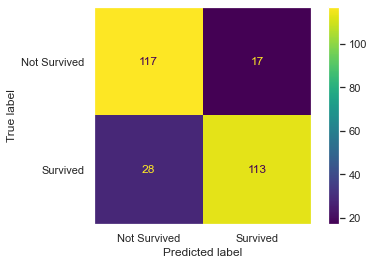

In [83]:
# confusion matrix
RFC_cm = confusion_matrix(ytest, RFC_ypred)
RFC_cmd = ConfusionMatrixDisplay(RFC_cm, display_labels=['Not Survived', 'Survived'])
RFC_cmd.plot()

In [84]:
# Accuracy score
RFC_acc_score = accuracy_score(ytest, RFC_ypred).round(2)
print(f"Accuracy of Random Forest Classifier Model: {RFC_acc_score*100} %")

Accuracy of Random Forest Classifier Model: 84.0 %


In [85]:
# classification report
RFC_cla_report = classification_report(ytest, RFC_ypred)
print(f"Classification Report: \n\n {RFC_cla_report}")

Classification Report: 

               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       134
         1.0       0.87      0.80      0.83       141

    accuracy                           0.84       275
   macro avg       0.84      0.84      0.84       275
weighted avg       0.84      0.84      0.84       275



    |Cross validation

In [86]:
# Evaluated a score by cross-validation.
RFC_cvs = cross_val_score(RFC_model, features[best_features], target, cv=5)

# mean value of all cross_val_score
cvs_mean = RFC_cvs.mean().round(2)
print(f"Mean value of cross_val_score: {cvs_mean*100} %")

Mean value of cross_val_score: 81.0 %


    | ROC Curve

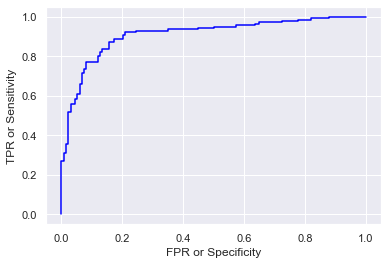

In [87]:
# predicted all possible outcome
RFC_ypred_prob = RFC_model.predict_proba(xtest[best_features])
FPR, TPR, thresh = roc_curve(ytest, RFC_ypred_prob[:,1])

# Ploting 
plt.plot(FPR, TPR, color='blue')
plt.ylabel("TPR or Sensitivity")
plt.xlabel("FPR or Specificity")
plt.grid()
plt.show()

# <font  color ='blue'> # Decision Tree Classifier </font>    

In [88]:
from sklearn.tree import DecisionTreeClassifier

    | Hyper Parameter tuning

In [89]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [90]:
DTC_params = {

    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': [3, 5, 7, 9, 11, 14, 18, 21],
    'max_features': ["auto", "sqrt", "log2"],
    'min_samples_split': [5, 10, 15, 20, 25],
    'splitter': ["best", "random"]
}

In [91]:
# Randomized search on hyper parameters.
DTC_grid = GridSearchCV(
                    DecisionTreeClassifier(),
                    DTC_params,
                    cv=5,
                    scoring='accuracy'
)  # we find out best model depending on the accuracy score

# Run fit with all sets of parameters
DTC_grid.fit(features[best_features], target)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9, 11, 14, 18, 21],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [5, 10, 15, 20, 25],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [92]:
# getting  the best parametter for this data set
DTC_grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_split': 15,
 'splitter': 'best'}

In [93]:
# Returned the list of most effective parametters
DTC_grid.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=7, max_features='auto',
                       min_samples_split=15)

In [94]:
# returns accuracy score
DTC_grid.best_score_

0.8137153976523759

In [95]:
# Training the model
DTC_model = DecisionTreeClassifier(
    criterion='entropy', max_depth=21, max_features='auto', min_samples_split=5)
DTC_model.fit(xtrain[best_features], ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=21, max_features='auto',
                       min_samples_split=5)

In [96]:
# Predict the model
DTC_ypred = DTC_model.predict(xtest[best_features])
print(f"Predicted Values: \n\n{DTC_ypred}")

Predicted Values: 

[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]


    | Model evaluation

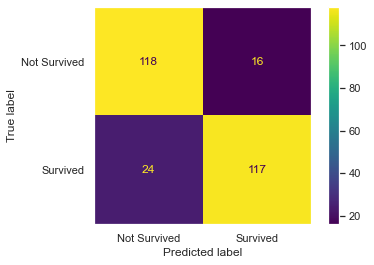

In [97]:
# confusion matrix
DTC_cm = confusion_matrix(ytest, DTC_ypred)
DTC_cmd = ConfusionMatrixDisplay(DTC_cm, display_labels=['Not Survived', 'Survived'])
DTC_cmd.plot()

In [98]:
# Accuracy score
DTC_acc_score = accuracy_score(ytest, DTC_ypred).round(2)
print(f"Accuracy of  Decision Tree Classifier Model: {DTC_acc_score*100} %")

Accuracy of  Decision Tree Classifier Model: 85.0 %


In [99]:
# classification report
DTC_cla_report = classification_report(ytest, DTC_ypred)
print(f"Classification Report: \n\n {DTC_cla_report}")

Classification Report: 

               precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       134
         1.0       0.88      0.83      0.85       141

    accuracy                           0.85       275
   macro avg       0.86      0.86      0.85       275
weighted avg       0.86      0.85      0.85       275



    |Cross validation

In [100]:
# Evaluated a score by cross-validation.
DTC_cvs = cross_val_score(DTC_model, features[best_features], target, cv=5)

# mean value of all cross_val_score
cvs_mean = DTC_cvs.mean().round(2)
print(f"Mean value of cross_val_score: {cvs_mean*100} %")

Mean value of cross_val_score: 77.0 %


    | ROC Curve

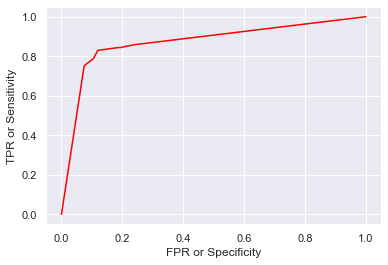

In [101]:
# predicted all possible outcome
DTC_ypred_prob = DTC_model.predict_proba(xtest[best_features])
FPR, TPR, thresh = roc_curve(ytest, DTC_ypred_prob[:,1])

# Ploting 
plt.plot(FPR, TPR, color='red')
plt.ylabel("TPR or Sensitivity")
plt.xlabel("FPR or Specificity")
plt.grid()
plt.show()

# <font color ='blue'> # KNeighbors Classifier </font>

In [102]:
from sklearn.neighbors import KNeighborsClassifier

    | Hyper Parameter tuning

In [103]:
# Returned Parameter names mapped to their values.
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [104]:
KNC_params = {

    'n_neighbors': [5, 7, 9, 11, 15, 17, 19, 21, 23],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['minkowski', 'euclidean', 'manhattan', 'hamming']
}

In [105]:
# Randomized search on hyper parameters.
KNC_grid = GridSearchCV(
    KNeighborsClassifier(),
    KNC_params,
    cv=5,
    scoring='accuracy'  # we find out best model depending on the accuracy score
)
# Run fit with all sets of parameters
KNC_grid.fit(features[best_features], target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'hamming'],
                         'n_neighbors': [5, 7, 9, 11, 15, 17, 19, 21, 23],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [106]:
# getting  the best parametter for this data set
KNC_grid.best_params_

{'algorithm': 'auto',
 'metric': 'hamming',
 'n_neighbors': 11,
 'weights': 'distance'}

In [107]:
# Returned the list of most effective parametters
KNC_grid.best_estimator_

KNeighborsClassifier(metric='hamming', n_neighbors=11, weights='distance')

In [108]:
# returns accuracy score
KNC_grid.best_score_

0.8080660347749671

In [109]:
# Training the model
KNC_model = KNeighborsClassifier(algorithm='brute', metric='hamming', n_neighbors=9, weights='distance')
KNC_model.fit(xtrain[best_features], ytrain)

KNeighborsClassifier(algorithm='brute', metric='hamming', n_neighbors=9,
                     weights='distance')

In [110]:
# Predict the model
KNC_ypred = KNC_model.predict(xtest[best_features])
print(f"Predicted Values: \n\n{KNC_ypred}")

Predicted Values: 

[1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]


    | Model evaluation

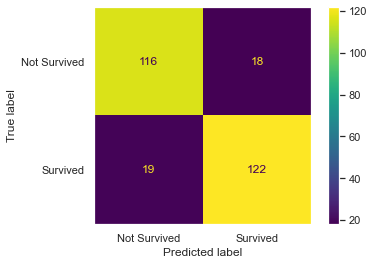

In [111]:
# confusion matrix
KNC_cm = confusion_matrix(ytest, KNC_ypred)
KNC_cmd = ConfusionMatrixDisplay(KNC_cm, display_labels=['Not Survived', 'Survived'])
KNC_cmd.plot()

In [112]:
# Accuracy score
KNC_acc_score = accuracy_score(ytest, KNC_ypred).round(2)
print(f"Accuracy of  KNeighbors Classifier Model: {KNC_acc_score*100} %")

Accuracy of  KNeighbors Classifier Model: 87.0 %


In [113]:
# classification report
KNC_cla_report = classification_report(ytest, KNC_ypred)
print(f"Classification Report: \n\n {KNC_cla_report}")

Classification Report: 

               precision    recall  f1-score   support

         0.0       0.86      0.87      0.86       134
         1.0       0.87      0.87      0.87       141

    accuracy                           0.87       275
   macro avg       0.87      0.87      0.87       275
weighted avg       0.87      0.87      0.87       275



    |Cross validation

In [114]:
# Evaluated a score by cross-validation.
KNC_cvs = cross_val_score(KNC_model, features[best_features], target, cv=5)

# mean value of all cross_val_score
cvs_mean = KNC_cvs.mean().round(2)
print(f"Mean value of cross_val_score: {cvs_mean*100} %")

Mean value of cross_val_score: 80.0 %


    | ROC Curve

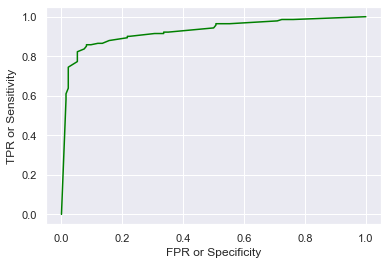

In [115]:
# predicted all possible outcome
KNC_ypred_prob = KNC_model.predict_proba(xtest[best_features])
FPR, TPR, thresh = roc_curve(ytest, KNC_ypred_prob[:,1])

# Ploting 
plt.plot(FPR, TPR, color='green')
plt.ylabel("TPR or Sensitivity")
plt.xlabel("FPR or Specificity")
plt.grid()
plt.show()

# Step-6: Summary

In [123]:
# All models are tabulated
Classifiers= ['LogisticRegression', 'RandomForestClassifier','DecisionTreeClassifier', 'KNeighborsClassifier']
Accuracy = [LR_acc_score, RFC_acc_score, DTC_acc_score, KNC_acc_score]

Accuracy_df = pd.DataFrame({'Classifiers': Classifiers, 'Accuracy': Accuracy})
Accuracy_df.sort_values(by='Accuracy', ascending=False,ignore_index=True, inplace=True)
Accuracy_df

,Classifiers,Accuracy
0,KNeighborsClassifier,0.87
1,DecisionTreeClassifier,0.85
2,RandomForestClassifier,0.84
3,LogisticRegression,0.79


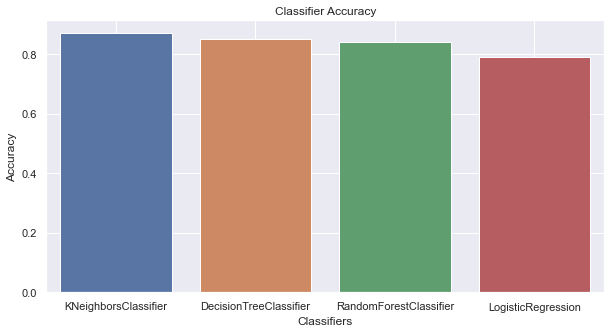

In [117]:
# plotting a barplot
plt.figure(figsize=(10, 5))
sns.set(style='dark')
sns.barplot(data=Accuracy_df, x='Classifiers', y='Accuracy')
plt.title('Classifier Accuracy')
plt.grid()
plt.show()

In [118]:
# Selection of the best Classifier
best_model = Accuracy_df.Classifiers[0]
best_Accuracy = Accuracy_df.Accuracy[0]

print(f"{best_model} is the best model for this problem as which has an  accuracy rate of {best_Accuracy*100} %")

KNeighborsClassifier is the best model for this problem as which has an  accuracy rate of 87.0 %


In [119]:
# Predict the Titanic test dataset
Titanic_Test_dataset_ypred=KNC_model.predict(Final_Test_df[best_features])
print(f"Predicted Values: \n\n{Titanic_Test_dataset_ypred}")

Predicted Values: 

[0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 

In [120]:
# Compressed into a dataFrame
Titanic_Test_dataset_outcome = pd.DataFrame({"PassengerId": Test_data.PassengerId, "Survived": Titanic_Test_dataset_ypred})
Titanic_Test_dataset_outcome

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,1.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [ ]:
# Compressed the outcomes of the Titanic test dataset  to a CSV file
Compressed = dict(method="zip", archive_name="Submission.csv")
Titanic_Test_dataset_outcome.to_csv('Titanic test dataset outcome.zip', index=False, compression = Compressed)